In [1]:
import os
import random
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler

from nichecompass.models import NicheCompass
from nichecompass.utils import (add_gps_from_gp_dict_to_adata,
                                compute_communication_gp_network,
                                visualize_communication_gp_network,
                                create_new_color_dict,
                                extract_gp_dict_from_mebocost_es_interactions,
                                extract_gp_dict_from_nichenet_lrt_interactions,
                                extract_gp_dict_from_omnipath_lr_interactions,
                                filter_and_combine_gp_dict_gps,
                                generate_enriched_gp_info_plots)

/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/nc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = NicheCompass.load(dir_path='./',
                          adata=None,
                          adata_file_name="./mouse_organo_imputed.h5ad",
                          gp_names_key="nichecompass_gp_names")

/lustre/scratch126/cellgen/team361/am74/Adib/mambaforge/minicondaa/envs/nc/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


--- INITIALIZING NEW NETWORK MODULE: VARIATIONAL GENE PROGRAM GRAPH AUTOENCODER ---
LOSS -> include_edge_recon_loss: True, include_gene_expr_recon_loss: True, rna_recon_loss: nb
NODE LABEL METHOD -> one-hop-norm
ACTIVE GP THRESHOLD RATIO -> 0.01
LOG VARIATIONAL -> True
CATEGORICAL COVARIATES EMBEDDINGS INJECTION -> ['gene_expr_decoder']
ONE HOP GCN NORM RNA NODE LABEL AGGREGATOR
ENCODER -> n_input: 5000, n_cat_covariates_embed_input: 0, n_hidden: 1631, n_latent: 1531, n_addon_latent: 100, n_fc_layers: 1, n_layers: 1, conv_layer: gatv2conv, n_attention_heads: 4, dropout_rate: 0.0, 
COSINE SIM GRAPH DECODER -> dropout_rate: 0.0
MASKED TARGET RNA DECODER -> n_prior_gp_input: 1531, n_addon_gp_input: 100, n_cat_covariates_embed_input: 3, n_output: 5000
MASKED SOURCE RNA DECODER -> n_prior_gp_input: 1531, n_addon_gp_input: 100, n_cat_covariates_embed_input: 3, n_output: 5000


In [3]:
adata = model.adata.copy()

In [4]:
adata.X.max()

139.0

In [5]:
active_gps = model.get_active_gps()
print(f"Number of total gene programs: {len(model.adata.uns['nichecompass_gp_names'])}.")
print(f"Number of active gene programs: {len(active_gps)}.")

Number of total gene programs: 1631.
Number of active gene programs: 1108.


In [6]:
gp_summary_df = model.get_gp_summary()
gp_summary_df[gp_summary_df["gp_active"] == True].head()

,gp_name,all_gp_idx,gp_active,active_gp_idx,n_source_genes,n_non_zero_source_genes,n_target_genes,n_non_zero_target_genes,gp_source_genes,gp_target_genes,gp_source_genes_weights,gp_target_genes_weights,gp_source_genes_importances,gp_target_genes_importances
0,EPOR_ligand_receptor_GP,0,True,0,1,1,0,0,[Epor],[],[1.0829],[],[1.0],[]
1,TP53_ligand_receptor_GP,1,True,1,1,1,0,0,[Trp53],[],[-0.4539],[],[1.0],[]
2,NPPA_ligand_receptor_GP,2,True,2,1,1,1,1,[Nppa],[Prkg1],[-1.5607],[-1.1115],[0.5841],[0.4159]
3,CXCL12_ligand_receptor_GP,3,True,3,1,1,0,0,[Cxcl12],[],[-0.5384],[],[1.0],[]
4,PTPN11_ligand_receptor_GP,4,True,4,1,1,0,0,[Ptpn11],[],[0.0245],[],[1.0],[]


In [7]:
import numpy as np
len(np.unique(adata.obs['niche']))

20

In [9]:
# ## Charecteristic GPs
# Cdh13_ligand_receptor_target_gene_GP
# Col1a1_ligand_receptor_target_gene_GP
# Bmp4_ligand_receptor_target_gene_GP
# Vegfb_ligand_receptor_target_gene_GP
# Pgf_ligand_receptor_target_gene_GP
# Cd44_ligand_receptor_target_gene_GP
# Bmp8a_ligand_receptor_target_gene_GP
# 9-cis-Retinoic_acid_metabolite_enzyme_sensor_GP
# Edn1_ligand_receptor_target_gene_GP
# NPPA_ligand_receptor_GP
# Cthrc1_ligand_receptor_target_gene_GP
# Pdgfc_ligand_receptor_target_gene_GP
# Ihh_ligand_receptor_target_gene_GP
# Spint1_ligand_receptor_target_gene_GP
# SFRP4_ligand_receptor_GP
# PDGFA_ligand_receptor_GP
# Guanine_metabolite_enzyme_sensor_GP
# Slitrk1_ligand_receptor_target_gene_GP
# Tgfbi_ligand_receptor_target_gene_GP
# FGF6_ligand_receptor_GP
# Epo_ligand_receptor_target_gene_GP
# Thpo_ligand_receptor_target_gene_GP
# Il10_ligand_receptor_target_gene_GP
# Fgf2_ligand_receptor_target_gene_GP
# Fgf17_ligand_receptor_target_gene_GP
# Efna2_ligand_receptor_target_gene_GP
# PCSK1N_ligand_receptor_GP
# DKK1_ligand_receptor_GP
# Calca_ligand_receptor_target_gene_GP
# Shh_ligand_receptor_target_gene_GP
# Gdf10_ligand_receptor_target_gene_GP
# Fgf3_ligand_receptor_target_gene_GP
# NPTN_ligand_receptor_GP
# Fgf8_ligand_receptor_target_gene_GP
# SAA1_ligand_receptor_GP
# IL6ST_ligand_receptor_GP
# Fgf18_ligand_receptor_target_gene_GP
# Dll1_ligand_receptor_target_gene_GP

In [10]:
gp_summary_df['all_genes'] = gp_summary_df['gp_source_genes'] + gp_summary_df['gp_target_genes']

gp_names_list = [
    'Cdh13_ligand_receptor_target_gene_GP', 'Col1a1_ligand_receptor_target_gene_GP',
    'Bmp4_ligand_receptor_target_gene_GP', 'Vegfb_ligand_receptor_target_gene_GP',
    'Pgf_ligand_receptor_target_gene_GP', 'Cd44_ligand_receptor_target_gene_GP',
    'Bmp8a_ligand_receptor_target_gene_GP', '9-cis-Retinoic_acid_metabolite_enzyme_sensor_GP',
    'Edn1_ligand_receptor_target_gene_GP', 'NPPA_ligand_receptor_GP',
    'Cthrc1_ligand_receptor_target_gene_GP', 'Pdgfc_ligand_receptor_target_gene_GP',
    'Ihh_ligand_receptor_target_gene_GP', 'Spint1_ligand_receptor_target_gene_GP',
    'SFRP4_ligand_receptor_GP', 'PDGFA_ligand_receptor_GP',
    'Guanine_metabolite_enzyme_sensor_GP', 'Slitrk1_ligand_receptor_target_gene_GP',
    'Tgfbi_ligand_receptor_target_gene_GP', 'FGF6_ligand_receptor_GP',
    'Epo_ligand_receptor_target_gene_GP', 'Thpo_ligand_receptor_target_gene_GP',
    'Il10_ligand_receptor_target_gene_GP', 'Fgf2_ligand_receptor_target_gene_GP',
    'Fgf17_ligand_receptor_target_gene_GP', 'Efna2_ligand_receptor_target_gene_GP',
    'PCSK1N_ligand_receptor_GP', 'DKK1_ligand_receptor_GP',
    'Calca_ligand_receptor_target_gene_GP', 'Shh_ligand_receptor_target_gene_GP',
    'Gdf10_ligand_receptor_target_gene_GP', 'Fgf3_ligand_receptor_target_gene_GP',
    'NPTN_ligand_receptor_GP', 'Fgf8_ligand_receptor_target_gene_GP',
    'SAA1_ligand_receptor_GP', 'IL6ST_ligand_receptor_GP',
    'Fgf18_ligand_receptor_target_gene_GP', 'Dll1_ligand_receptor_target_gene_GP'
]
def get_top_genes(gp_name, top_n=10):
    genes = gp_summary_df[gp_summary_df['gp_name'] == gp_name]['all_genes'].explode().tolist()
    return genes[:top_n]

top_genes_per_gp = {gp_name: get_top_genes(gp_name) for gp_name in gp_names_list}

for gp_name, genes in top_genes_per_gp.items():
    if genes:  # Check if the list is not empty
        print(f"{gp_name}: {', '.join(genes)}")
    else:
        print(f"{gp_name}: No genes found")

Cdh13_ligand_receptor_target_gene_GP: Lsp1, Cdh3, Axin2, Cdh11, Casp3, Cdc20, Nfe2l2, E2f1, Btg2, Egr2
Col1a1_ligand_receptor_target_gene_GP: Col1a1, Cd93, Col5a1, Col4a1, Col9a1, Cnn1, Cd9, Itga3, Tm6sf1, Sox4
Bmp4_ligand_receptor_target_gene_GP: Bmp4, Fam114a1, Sct, Msx2, Sost, Gata2, Mbnl3, Tbx3, Pkp2, Arhgap29
Vegfb_ligand_receptor_target_gene_GP: Vegfb, Creb3l2, Flt1, Rhobtb3, Kdr, Sfrp1, Atad2, Hey1, Cenpe, Kif15
Pgf_ligand_receptor_target_gene_GP: Pgf, Kdr, Acsl1, Etv5, Flt1, Tceal1, Crem, Tal1, Arid5b, Enpp2
Cd44_ligand_receptor_target_gene_GP: Cd44, Cldn7, Enpp2, Chd2, Rgs2, H2-Q2, Dkk1, Akt1, Atf3, Acvr2b
Bmp8a_ligand_receptor_target_gene_GP: Ptprk, Tspan8, Rasl11b, Vtn, Col5a2, Alcam, Ccdc102a, Bmpr1a, Stard10, Gpd2
9-cis-Retinoic_acid_metabolite_enzyme_sensor_GP: Aldh1a2
Edn1_ligand_receptor_target_gene_GP: Nppb, Tbx5, Ece1, Icam2, Nppa, Atp2c1, Ednrb, Ednra, Tnc, Gna11
NPPA_ligand_receptor_GP: Nppa, Prkg1
Cthrc1_ligand_receptor_target_gene_GP: Cthrc1, Lhx2, Myo10, Cldn13, 

In [11]:
gp_genes = {
    'Cdh13_ligand_receptor_target_gene_GP': ['Lsp1', 'Cdh3', 'Axin2', 'Cdh11', 'Casp3', 'Cdc20', 'Nfe2l2', 'E2f1', 'Btg2', 'Egr2'],
    'Col1a1_ligand_receptor_target_gene_GP': ['Col1a1', 'Cd93', 'Col5a1', 'Col4a1', 'Col9a1', 'Cnn1', 'Cd9', 'Itga3', 'Tm6sf1', 'Sox4'],
    'Bmp4_ligand_receptor_target_gene_GP': ['Bmp4', 'Fam114a1', 'Sct', 'Msx2', 'Sost', 'Gata2', 'Mbnl3', 'Tbx3', 'Pkp2', 'Arhgap29'],
    'Vegfb_ligand_receptor_target_gene_GP': ['Vegfb', 'Creb3l2', 'Flt1', 'Rhobtb3', 'Kdr', 'Sfrp1', 'Atad2', 'Hey1', 'Cenpe', 'Kif15'],
    'Pgf_ligand_receptor_target_gene_GP': ['Pgf', 'Kdr', 'Acsl1', 'Etv5', 'Flt1', 'Tceal1', 'Crem', 'Tal1', 'Arid5b', 'Enpp2'],
    'Cd44_ligand_receptor_target_gene_GP': ['Cd44', 'Cldn7', 'Enpp2', 'Chd2', 'Rgs2', 'H2-Q2', 'Dkk1', 'Akt1', 'Atf3', 'Acvr2b'],
    'Bmp8a_ligand_receptor_target_gene_GP': ['Ptprk', 'Tspan8', 'Rasl11b', 'Vtn', 'Col5a2', 'Alcam', 'Ccdc102a', 'Bmpr1a', 'Stard10', 'Gpd2'],
    '9-cis-Retinoic_acid_metabolite_enzyme_sensor_GP': ['Aldh1a2'],
    'Edn1_ligand_receptor_target_gene_GP': ['Nppb', 'Tbx5', 'Ece1', 'Icam2', 'Nppa', 'Atp2c1', 'Ednrb', 'Ednra', 'Tnc', 'Gna11'],
    'NPPA_ligand_receptor_GP': ['Nppa', 'Prkg1'],
    'Cthrc1_ligand_receptor_target_gene_GP': ['Cthrc1', 'Lhx2', 'Myo10', 'Cldn13', 'Ptpre', 'Aldh1a3', 'Gmpr', 'Sertad2', 'Pam', 'Tacc1'],
    'Pdgfc_ligand_receptor_target_gene_GP': ['Pdgfc', 'Svep1', 'Pdlim3', 'Hoxa2', 'Slc20a1', 'Ednra', 'Alpk2', 'Cth', 'Hk2', 'Nrg1'],
    'Ihh_ligand_receptor_target_gene_GP': ['Ihh', 'Serpinb6a', 'Ifitm3', 'Capg', 'Wnt5a', 'Alcam', 'Klf7', 'Ptch1', 'Ppp3ca', 'Cnot6'],
    'Spint1_ligand_receptor_target_gene_GP': ['Spint1', 'St14', 'Mmp14', 'Fstl1', 'Hey1', 'Sulf2', 'Krt15', 'Pcdh7', 'Prss23', 'Ndrg1'],
    'SFRP4_ligand_receptor_GP': ['Wnt6'],
    'PDGFA_ligand_receptor_GP': ['Pdgfa'],
    'Guanine_metabolite_enzyme_sensor_GP': ['Aprt', 'Pnp', 'Hprt', 'Qtrt1'],
    'Slitrk1_ligand_receptor_target_gene_GP': ['Sox10', 'Mme', 'Spred1', 'Rragd', 'Snx10', 'Ptprd', 'Capg', 'Lpl', 'Sgms1', 'Nav2'],
    'Tgfbi_ligand_receptor_target_gene_GP': ['Tgfbi', 'Itgb5', 'Lsp1', 'Itga6', 'Bmp2', 'Socs3', 'Snai1', 'Epb41', 'Efna1', 'Ndrg1'],
    'FGF6_ligand_receptor_GP': ['Cdh11'],
    'Epo_ligand_receptor_target_gene_GP': ['Efnb3', 'Cox7a1', 'Krt20', 'Mme', 'Krt23', 'Tango2', 'Isl1', 'Bcr', 'Id4', 'Gal'],
    'Thpo_ligand_receptor_target_gene_GP': ['Nrgn', 'Tspan33', 'Clec1b', 'Efnb1', 'Nudt10', 'Dapp1', 'Tnnc2', 'Smox', 'Snca', 'Lcp1'],
    'Il10_ligand_receptor_target_gene_GP': ['Tdo2', 'Stab1', 'Vamp5', 'Cnrip1', 'Impa2', 'Gas6', 'Ctsc', 'Colec12', 'Ucp2', 'Acvr1'],
    'Fgf2_ligand_receptor_target_gene_GP': ['Peli2', 'Smagp', 'Tns1', 'Lmod1', 'Capg', 'Cit', 'Hapln1', 'Smtn', 'Colec12', 'Elk3'],
    'Fgf17_ligand_receptor_target_gene_GP': ['Fgf17', 'Sp8', 'N4bp3', 'Emx2', 'Aldoc', 'Etv5', 'Fgfbp1', 'Egr2', 'Isg20', 'Igf1'],
    'Efna2_ligand_receptor_target_gene_GP': ['Efna2', 'Epha5', 'Epha4', 'Epha7', 'H2-Q2', 'Adm', 'Tgfbi', 'Lmna', 'Tnc', 'Cd44'],
    'PCSK1N_ligand_receptor_GP': ['Pcsk1n'],
    'DKK1_ligand_receptor_GP': ['Dkk1'],
    'Calca_ligand_receptor_target_gene_GP': ['Calca', 'Ramp1', 'Lpar3', 'Tax1bp3', 'Cd44', 'Bag1', 'Nfs1', 'Krt19', 'Klk1', 'Gja1'],
    'Shh_ligand_receptor_target_gene_GP': ['Shh', 'Nkx2-9', 'Foxf2', 'Slit2', 'Mnx1', 'Foxd1', 'Olig2', 'Prss35', 'Nkx6-1', 'Pdgfc'],
    'Gdf10_ligand_receptor_target_gene_GP': ['Gdf10', 'Shc1', 'Smad6', 'Spp1', 'Tnc', 'Col2a1', 'H2-Q2', 'Clu', 'Cd44', 'Timp1'],
    'Fgf3_ligand_receptor_target_gene_GP': ['Fgf3', 'Anxa3', 'Spp1', 'Fgfr1', 'Sox9', 'Gata3', 'Crem', 'H2-Q2', 'Col1a2', 'Zbtb20'],
    'NPTN_ligand_receptor_GP': ['Epor'],
    'Fgf8_ligand_receptor_target_gene_GP': ['Fgf8', 'Fgfbp3', 'Bcr', 'Spns2', 'Gna13', 'Camk2d', 'Ube2cbp', 'Akap12', 'Fam171b', 'Iqgap1'],
    'SAA1_ligand_receptor_GP': ['Saa2', 'Saa1', 'Scarb1'],
    'IL6ST_ligand_receptor_GP': ['Epor'],
    'Fgf18_ligand_receptor_target_gene_GP': ['Fgf18', 'Tnni2', 'Plp1', 'Fgfr2', 'Bsg', 'Fgfbp1', 'Hesx1', 'Myom1', 'Gap43', 'Hyal2'],
    'Dll1_ligand_receptor_target_gene_GP': ['Dll1', 'Rhd', 'Dll1', 'Slc30a10', 'Adgrg1', 'Arhgap24', 'Hoxa5', 'Amotl2', 'Notch1', 'Slc6a6']
}

merged_genes = []
for genes in gp_genes.values():
    merged_genes.extend(genes)

top_ten_genes_per_charecteristic_GPs=list(np.unique((merged_genes)))
top_ten_genes_per_charecteristic_GPs

['Acsl1',
 'Acvr1',
 'Acvr2b',
 'Adgrg1',
 'Adm',
 'Akap12',
 'Akt1',
 'Alcam',
 'Aldh1a2',
 'Aldh1a3',
 'Aldoc',
 'Alpk2',
 'Amotl2',
 'Anxa3',
 'Aprt',
 'Arhgap24',
 'Arhgap29',
 'Arid5b',
 'Atad2',
 'Atf3',
 'Atp2c1',
 'Axin2',
 'Bag1',
 'Bcr',
 'Bmp2',
 'Bmp4',
 'Bmpr1a',
 'Bsg',
 'Btg2',
 'Calca',
 'Camk2d',
 'Capg',
 'Casp3',
 'Ccdc102a',
 'Cd44',
 'Cd9',
 'Cd93',
 'Cdc20',
 'Cdh11',
 'Cdh3',
 'Cenpe',
 'Chd2',
 'Cit',
 'Cldn13',
 'Cldn7',
 'Clec1b',
 'Clu',
 'Cnn1',
 'Cnot6',
 'Cnrip1',
 'Col1a1',
 'Col1a2',
 'Col2a1',
 'Col4a1',
 'Col5a1',
 'Col5a2',
 'Col9a1',
 'Colec12',
 'Cox7a1',
 'Creb3l2',
 'Crem',
 'Cth',
 'Cthrc1',
 'Ctsc',
 'Dapp1',
 'Dkk1',
 'Dll1',
 'E2f1',
 'Ece1',
 'Ednra',
 'Ednrb',
 'Efna1',
 'Efna2',
 'Efnb1',
 'Efnb3',
 'Egr2',
 'Elk3',
 'Emx2',
 'Enpp2',
 'Epb41',
 'Epha4',
 'Epha5',
 'Epha7',
 'Epor',
 'Etv5',
 'Fam114a1',
 'Fam171b',
 'Fgf17',
 'Fgf18',
 'Fgf3',
 'Fgf8',
 'Fgfbp1',
 'Fgfbp3',
 'Fgfr1',
 'Fgfr2',
 'Flt1',
 'Foxd1',
 'Foxf2',
 'Fstl1',
 'Gal',

In [12]:
adata.X.max(),adata.layers['counts'].max()

(139.0, 139.0)

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [14]:
sc.pp.highly_variable_genes(adata,subset=False,n_top_genes=2000)

In [15]:
sc.pp.pca(adata)

In [16]:
sc.pp.neighbors(adata,use_rep='X_pca')

In [17]:
sc.tl.umap(adata)

In [18]:
sc.set_figure_params(dpi=350)

In [19]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

resolutions = [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]

silhouette_scores = []

for res in resolutions:
    sc.tl.leiden(adata, resolution=res, key_added=f'leiden_{res}')
    
    labels = adata.obs[f'leiden_{res}']
    silhouette_avg = silhouette_score(adata.obsm['X_pca'], labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)



/tmp/ipykernel_3497666/2031023225.py:15: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=res, key_added=f'leiden_{res}')


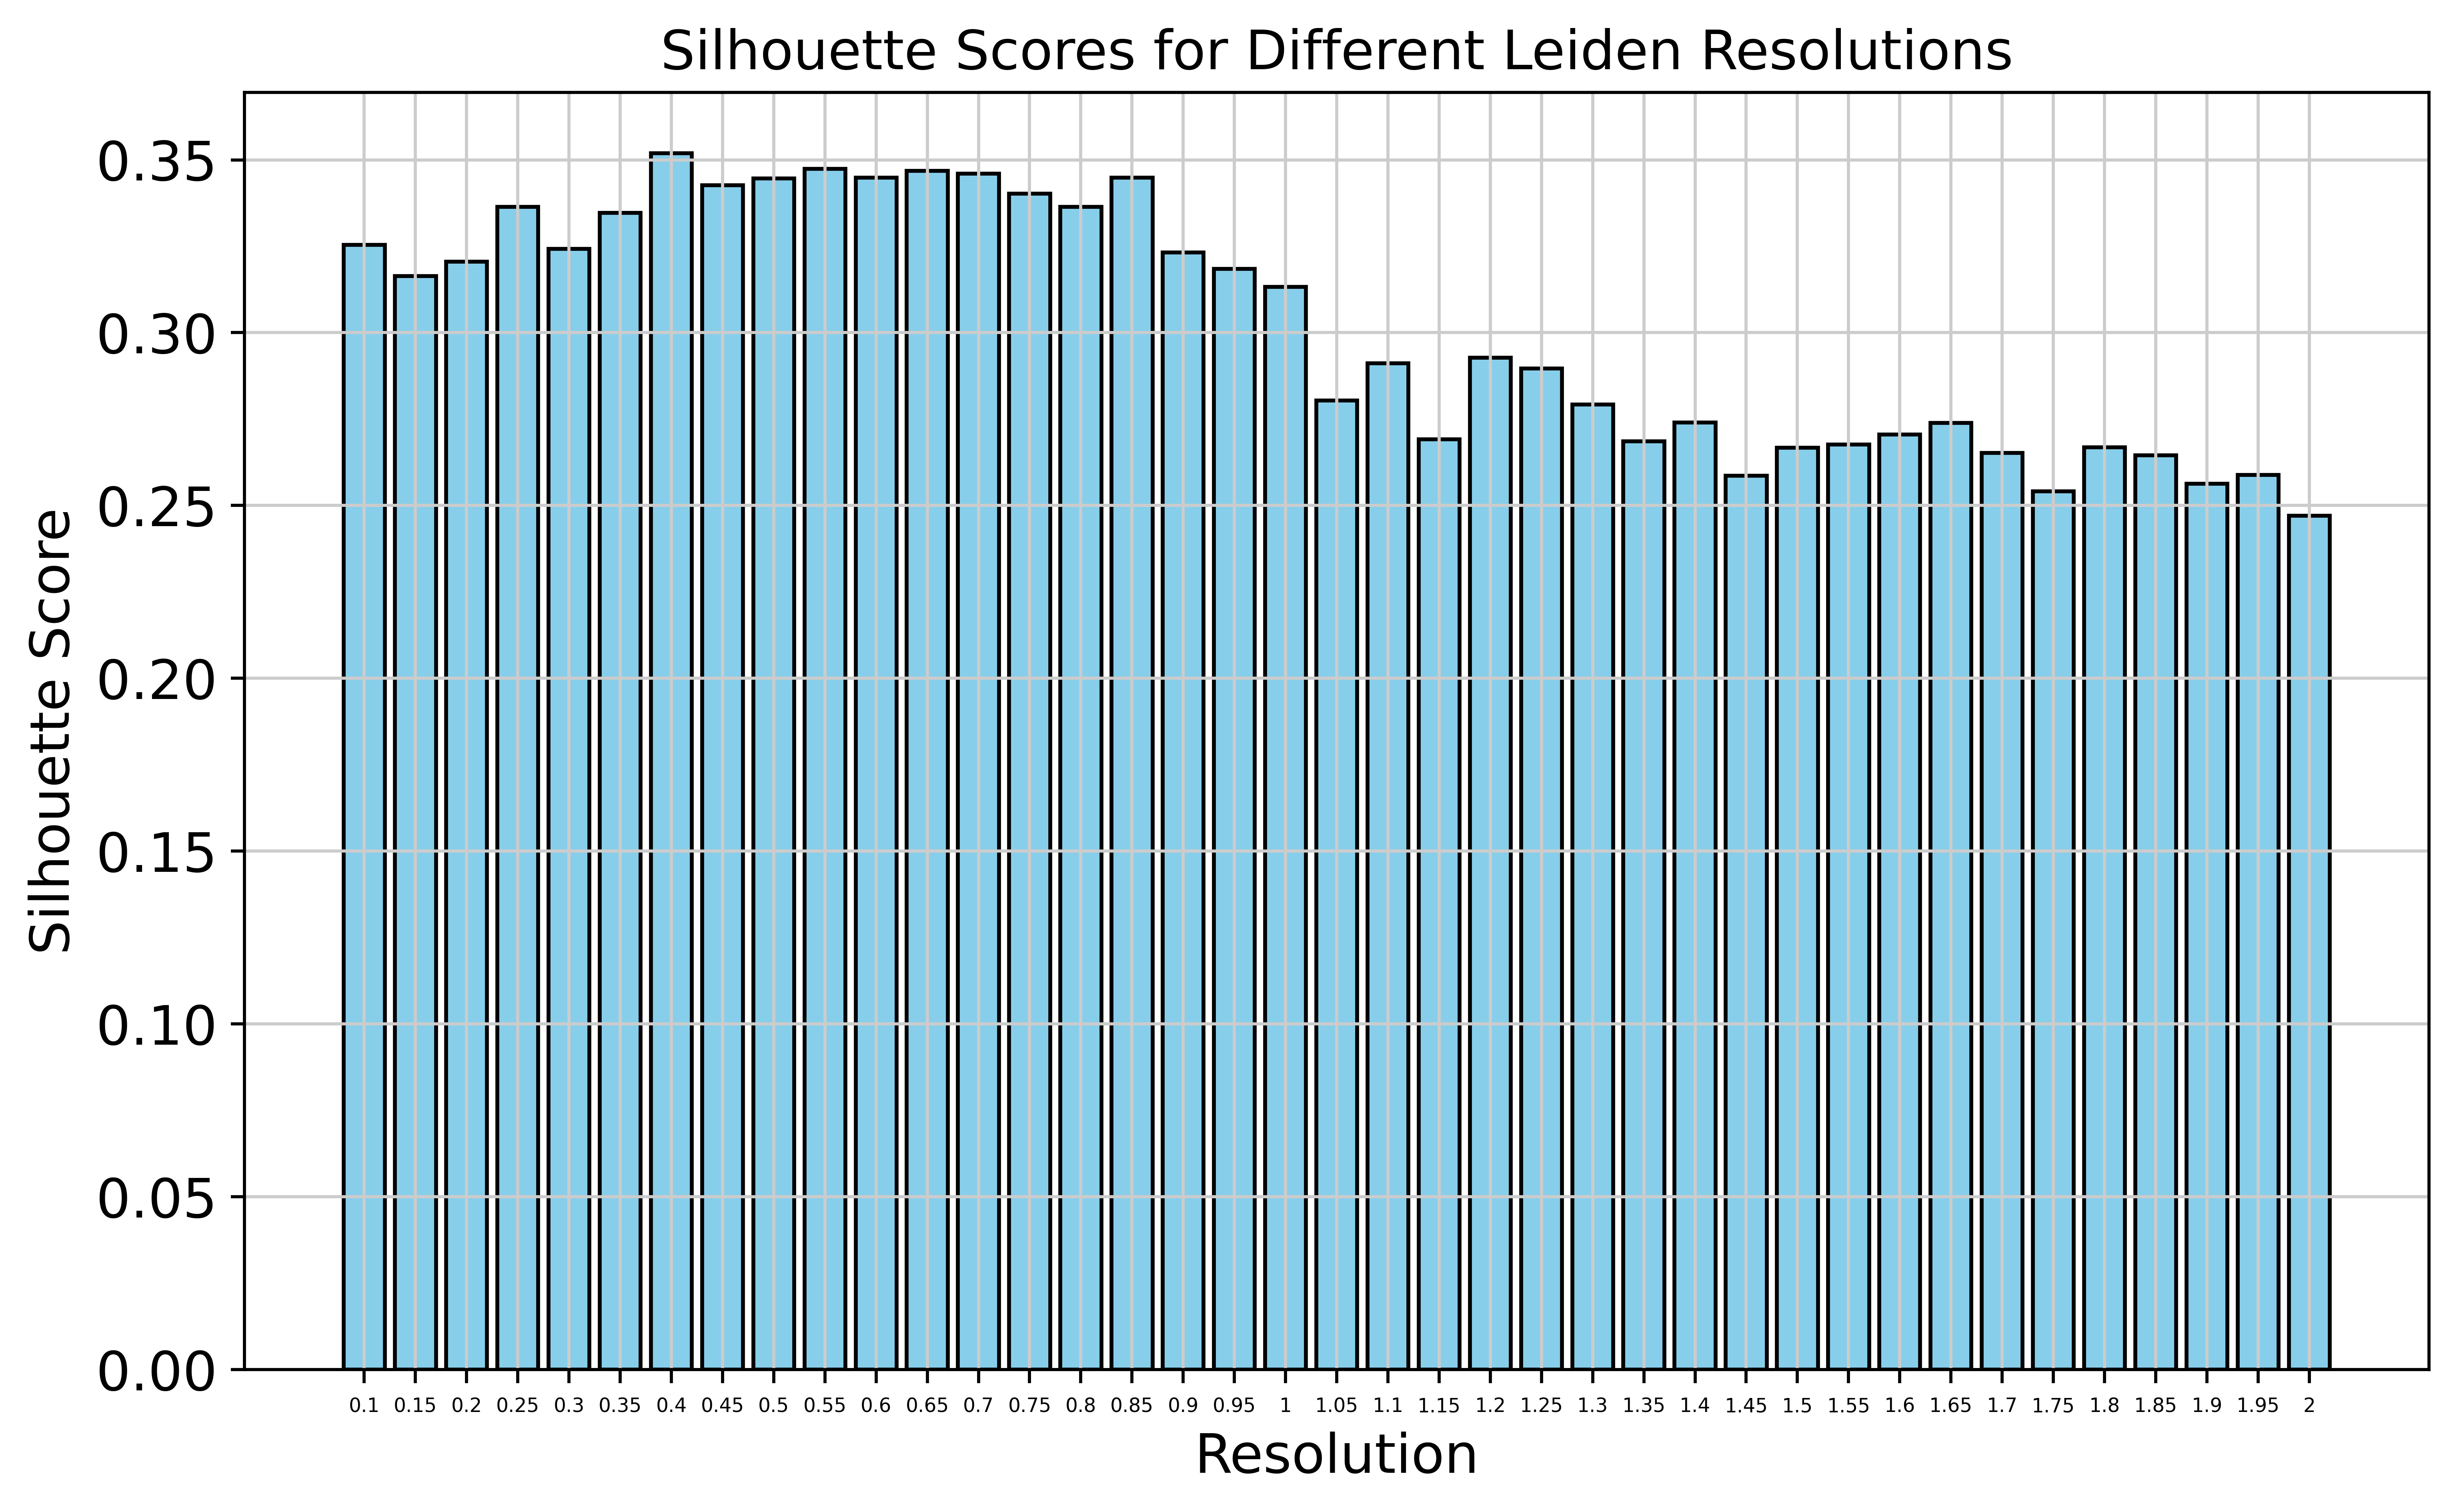

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(resolutions)), silhouette_scores, color='skyblue', edgecolor='black')
plt.xticks(range(len(resolutions)), [str(r) for r in resolutions],fontsize=5)
plt.xlabel('Resolution')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Leiden Resolutions')
plt.show()

In [24]:
sc.tl.leiden(adata , resolution=0.4 ,key_added='leiden_0.4')

In [25]:
adata.obs['leiden_0.4'] = adata.obs['leiden_0.4'].astype(str).apply(lambda x: f'c_{x}')

print(np.unique(adata.obs['leiden_0.4']))

['c_0' 'c_1' 'c_10' 'c_11' 'c_12' 'c_13' 'c_14' 'c_15' 'c_16' 'c_17'
 'c_18' 'c_19' 'c_2' 'c_20' 'c_21' 'c_3' 'c_4' 'c_5' 'c_6' 'c_7' 'c_8'
 'c_9']


In [52]:
import scanpy as sc
import pandas as pd

degs = {}

for cluster in adata.obs['leiden_0.4'].unique():
    sc.tl.rank_genes_groups(adata, 'leiden_0.4', method='t-test', groups=[cluster], reference='rest')
    
    de_res = adata.uns['rank_genes_groups']
    if de_res:
        degs[cluster] = {
            'names': de_res['names'][cluster],
            'logfoldchanges': de_res['logfoldchanges'][cluster],
            'pvals_adj': de_res['pvals_adj'][cluster]
        }
    else:
        print(f"No results for cluster {cluster}")


In [53]:
all_top_degs = []

for cluster, de_res in degs.items():
    if de_res:
        de_df = pd.DataFrame({
            'gene': de_res['names'],
            'logfoldchange': de_res['logfoldchanges'],
            'pval_adj': de_res['pvals_adj']
        })
        
        filtered_degs = de_df[de_df['pval_adj'] < 0.05]
        
        top_degs_pos = filtered_degs.nlargest(20, 'logfoldchange')
        top_degs_neg = filtered_degs.nsmallest(20, 'logfoldchange')
        
        top_degs_cluster = pd.concat([top_degs_pos, top_degs_neg]).drop_duplicates()
        
        all_top_degs.append(top_degs_cluster)

all_top_degs_df = pd.concat(all_top_degs).drop_duplicates()
all_top_degs_df.reset_index(drop=True, inplace=True)

print(all_top_degs_df)


              gene  logfoldchange       pval_adj
0             Sla2       9.307562   0.000000e+00
1          Gm15915       8.834216  2.766450e-250
2           Mfsd2b       8.578482   0.000000e+00
3            Prkca       8.498332  2.827024e-285
4            Smim5       8.467319   0.000000e+00
..             ...            ...            ...
875        Fam181b     -27.530325   0.000000e+00
876        Slc19a1     -27.512253   0.000000e+00
877          Crmp1     -27.510126   0.000000e+00
878  1700011H14Rik     -27.509130   0.000000e+00
879           Six1     -27.493534   0.000000e+00

[880 rows x 3 columns]


In [58]:
gene_names = all_top_degs_df['gene'].unique()

top_20_deg_per_cluster=list(np.unique((gene_names)))
top_20_deg_per_cluster

['1700011H14Rik',
 '1700019B21Rik',
 '2010300C02Rik',
 '2210011C24Rik',
 '2610035D17Rik',
 '2700046A07Rik',
 '3632451O06Rik',
 '4930523C07Rik',
 '5730508B09Rik',
 '6030468B19Rik',
 '9130410C08Rik',
 'Aard',
 'Abi3',
 'Ackr3',
 'Acsl5',
 'Acvr1',
 'Adamts9',
 'Add2',
 'Adgrg1',
 'Adssl1',
 'Agtr1a',
 'Aif1l',
 'Ajuba',
 'Alas2',
 'Aldh1a2',
 'Aldh1a3',
 'Aldh3b2',
 'Alx1',
 'Ambp',
 'Angpt4',
 'Angptl6',
 'Ank1',
 'Anxa2',
 'Anxa3',
 'Anxa6',
 'Apba2',
 'Apela',
 'Apoa5',
 'Arg1',
 'Arhgap24',
 'Arhgdib',
 'Arhgef15',
 'Arxes1',
 'Asb12',
 'BC022687',
 'Barhl2',
 'Bcam',
 'Bco1',
 'Bend5',
 'Bgn',
 'Bhlha9',
 'Blvrb',
 'Bmi1',
 'Bmp4',
 'Brwd1',
 'Bvht',
 'C130026L21Rik',
 'C130080G10Rik',
 'C1ql1',
 'Cacna1b',
 'Cadm1',
 'Calca',
 'Camk1g',
 'Capn6',
 'Car3',
 'Cbln1',
 'Cbr3',
 'Ccdc186',
 'Ccdc42',
 'Cd93',
 'Cdh2',
 'Cdh5',
 'Cdx2',
 'Cdx4',
 'Cep164',
 'Cer1',
 'Chchd10',
 'Chst2',
 'Cib2',
 'Cited4',
 'Ckb',
 'Cldn10',
 'Cldn11',
 'Cldn13',
 'Cldn2',
 'Cldn4',
 'Cldn6',
 'Cldn7',


In [61]:
set1 = set(top_ten_genes_per_charecteristic_GPs)
set2 = set(top_20_deg_per_cluster)

intersection = set1.intersection(set2)

print("Intersection:", intersection)

Intersection: {'Efnb1', 'Ube2cbp', 'Snai1', 'Aldh1a3', 'Saa1', 'Bmp4', 'Stab1', 'Adgrg1', 'Saa2', 'Cth', 'Pcsk1n', 'Calca', 'Fgf18', 'Isg20', 'Gja1', 'Msx2', 'Sct', 'Nkx2-9', 'Vamp5', 'Etv5', 'Rhd', 'Tgfbi', 'Cldn7', 'Socs3', 'Gmpr', 'Egr2', 'Mbnl3', 'Olig2', 'Nkx6-1', 'Arhgap24', 'Id4', 'Stard10', 'Prss35', 'Emx2', 'Shh', 'Anxa3', 'Ptprd', 'Snca', 'Nrgn', 'Epha5', 'Lhx2', 'Sox10', 'Plp1', 'Sfrp1', 'H2-Q2', 'Dapp1', 'Hapln1', 'Fgfbp3', 'Slc30a10', 'Efna1', 'Hesx1', 'Col2a1', 'Sp8', 'Fam171b', 'Krt19', 'Fgf3', 'Dll1', 'Smagp', 'Fgf17', 'Myom1', 'Enpp2', 'Cldn13', 'Mmp14', 'Icam2', 'Foxd1', 'Gdf10', 'Spp1', 'Colec12', 'Wnt6', 'Acvr1', 'Tns1', 'Aldh1a2', 'Mme', 'Cd93', 'Tacc1'}


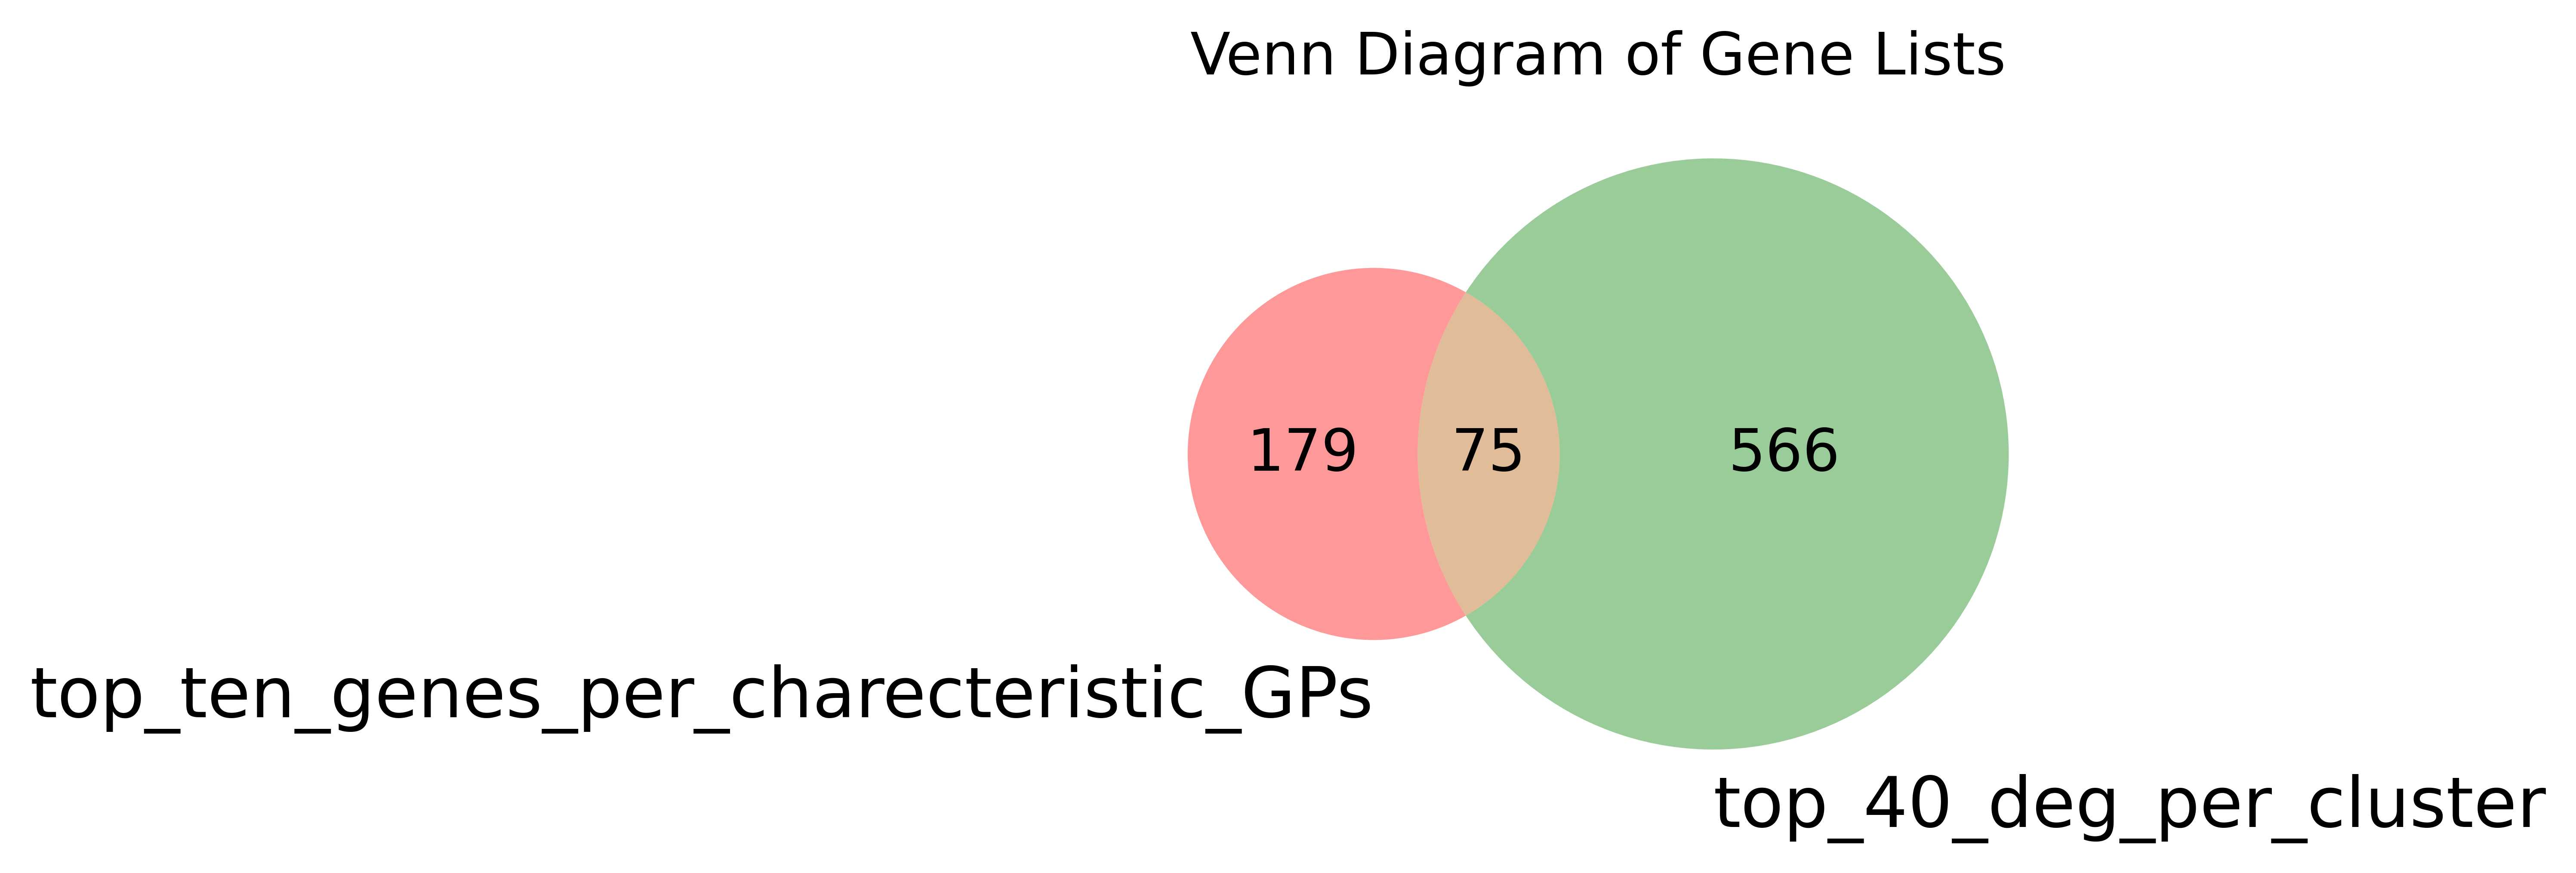

In [64]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
venn2([set1, set2], ('top_ten_genes_per_charecteristic_GPs', 'top_40_deg_per_cluster'))

plt.title('Venn Diagram of Gene Lists')
plt.show()

In [71]:
num_iterations = 10
num_genes_to_select = 40
seeds = np.arange(10)  # 10 different seeds

clusters = adata.obs['leiden_0.4'].unique()
cluster_genes = {cluster: adata[adata.obs['leiden_0.4'] == cluster].var_names.tolist() for cluster in clusters}

all_selected_genes = set()

for cluster, genes in cluster_genes.items():
    for seed in seeds:
        np.random.seed(seed)
        if len(genes) >= num_genes_to_select:  # Ensure there are enough genes to select
            selected_genes = np.random.choice(genes, num_genes_to_select, replace=False)
            all_selected_genes.update(selected_genes)
        else:
            print(f"Cluster {cluster} has fewer than {num_genes_to_select} genes.")

aggregated_genes_list = list(all_selected_genes)
aggregated_genes_df = pd.DataFrame(aggregated_genes_list, columns=['Gene'])

print(aggregated_genes_df)

print("Aggregated Genes List:")
print(aggregated_genes_list)


              Gene
0    2610035D17Rik
1           Triobp
2           Arid3b
3              Id1
4             Cd81
..             ...
384        Ppp2r3c
385            Lpp
386         Trim63
387          Lactb
388         Fblim1

[389 rows x 1 columns]
Aggregated Genes List:
['2610035D17Rik', 'Triobp', 'Arid3b', 'Id1', 'Cd81', 'Cnih2', 'P4ha1', 'Crem', 'Gna13', 'Rpl10-ps3', 'Col9a3', 'Epdr1', 'Ptpn18', 'Bad', 'Foxe1', 'Tmem184c', 'Sall3', 'Zdhhc2', 'Arid3a', 'Col1a1', 'Emp2', 'Tdp1', 'Adm', 'Ndrg4', '5430416N02Rik', 'Mien1', 'Rsf1', 'Zcrb1', 'Cpne5', 'Apeh', 'Txndc12', 'Fam110b', 'Lpar1', 'Tomm20', 'Cdca3', 'Fcf1', 'Ppt1', 'Itih5', 'Mkks', 'Nek6', 'Tmem251', 'Nfe2', 'Usp15', 'Zscan21', 'Wdr36', 'Arhgdia', 'Fez2', 'Cdh1', '2900097C17Rik', 'Ptpra', 'Dpm3', 'Nae1', 'Pigx', 'Avpi1', 'Phlda1', 'Msi2', 'Pfdn6', 'Dis3', 'Tspan32', 'Ankrd37', '1010001N08Rik', 'Tspan6', 'Fam134b', 'Dap', 'Dctd', 'Akr7a5', 'Slc35b1', 'Fstl1', 'Copb2', 'Jagn1', 'Dtd1', 'Oxct1', 'Mxd4', 'Synpo2l', 'Prkch', 'Lamc1',

In [74]:
aggregated_genes_list = list(np.unique(aggregated_genes_list))
aggregated_genes_list

['1010001N08Rik',
 '1110059E24Rik',
 '2010111I01Rik',
 '2610002M06Rik',
 '2610035D17Rik',
 '2900097C17Rik',
 '4833439L19Rik',
 '5430416N02Rik',
 '6030468B19Rik',
 'Abcd3',
 'Abcf1',
 'Acin1',
 'Adm',
 'Ak1',
 'Akr7a5',
 'Akt1s1',
 'Alx1',
 'Amph',
 'Ank2',
 'Ankrd37',
 'Apeh',
 'Apoa5',
 'Aqp3',
 'Arhgap24',
 'Arhgdia',
 'Arid3a',
 'Arid3b',
 'Arl1',
 'Arl3',
 'Armc6',
 'Atp5c1',
 'Atxn7l3b',
 'Avpi1',
 'B3gat3',
 'BC003965',
 'Bad',
 'Banf1',
 'Bclaf1',
 'Bmi1',
 'Bmp7',
 'Brix1',
 'Bves',
 'Calca',
 'Capn2',
 'Capn6',
 'Car14',
 'Cars',
 'Casz1',
 'Ccdc12',
 'Ccnd3',
 'Cd302',
 'Cd320',
 'Cd81',
 'Cdc25a',
 'Cdc42ep4',
 'Cdca3',
 'Cdh1',
 'Cdh11',
 'Cdh5',
 'Cdk1',
 'Cdkn2aipnl',
 'Cdo1',
 'Cebpzos',
 'Cep57',
 'Chmp5',
 'Cited1',
 'Cited4',
 'Cks1b',
 'Cldn11',
 'Clip3',
 'Clns1a',
 'Cnih2',
 'Col1a1',
 'Col5a1',
 'Col9a3',
 'Commd7',
 'Commd9',
 'Copb2',
 'Cox18',
 'Cpne5',
 'Crb2',
 'Crem',
 'Csf2rb',
 'Ctdsp1',
 'Ctxn3',
 'Cxcl12',
 'Cyb5r3',
 'Dab2',
 'Dap',
 'Dcaf11',
 'Dcp1b',

In [75]:
set1 = set(top_ten_genes_per_charecteristic_GPs)
set2 = set(top_20_deg_per_cluster)
set3 = set(aggregated_genes_list)
intersection = set1.intersection(set2,set3)

print("Intersection:", intersection)

Intersection: {'Foxd1', 'Calca', 'Arhgap24'}


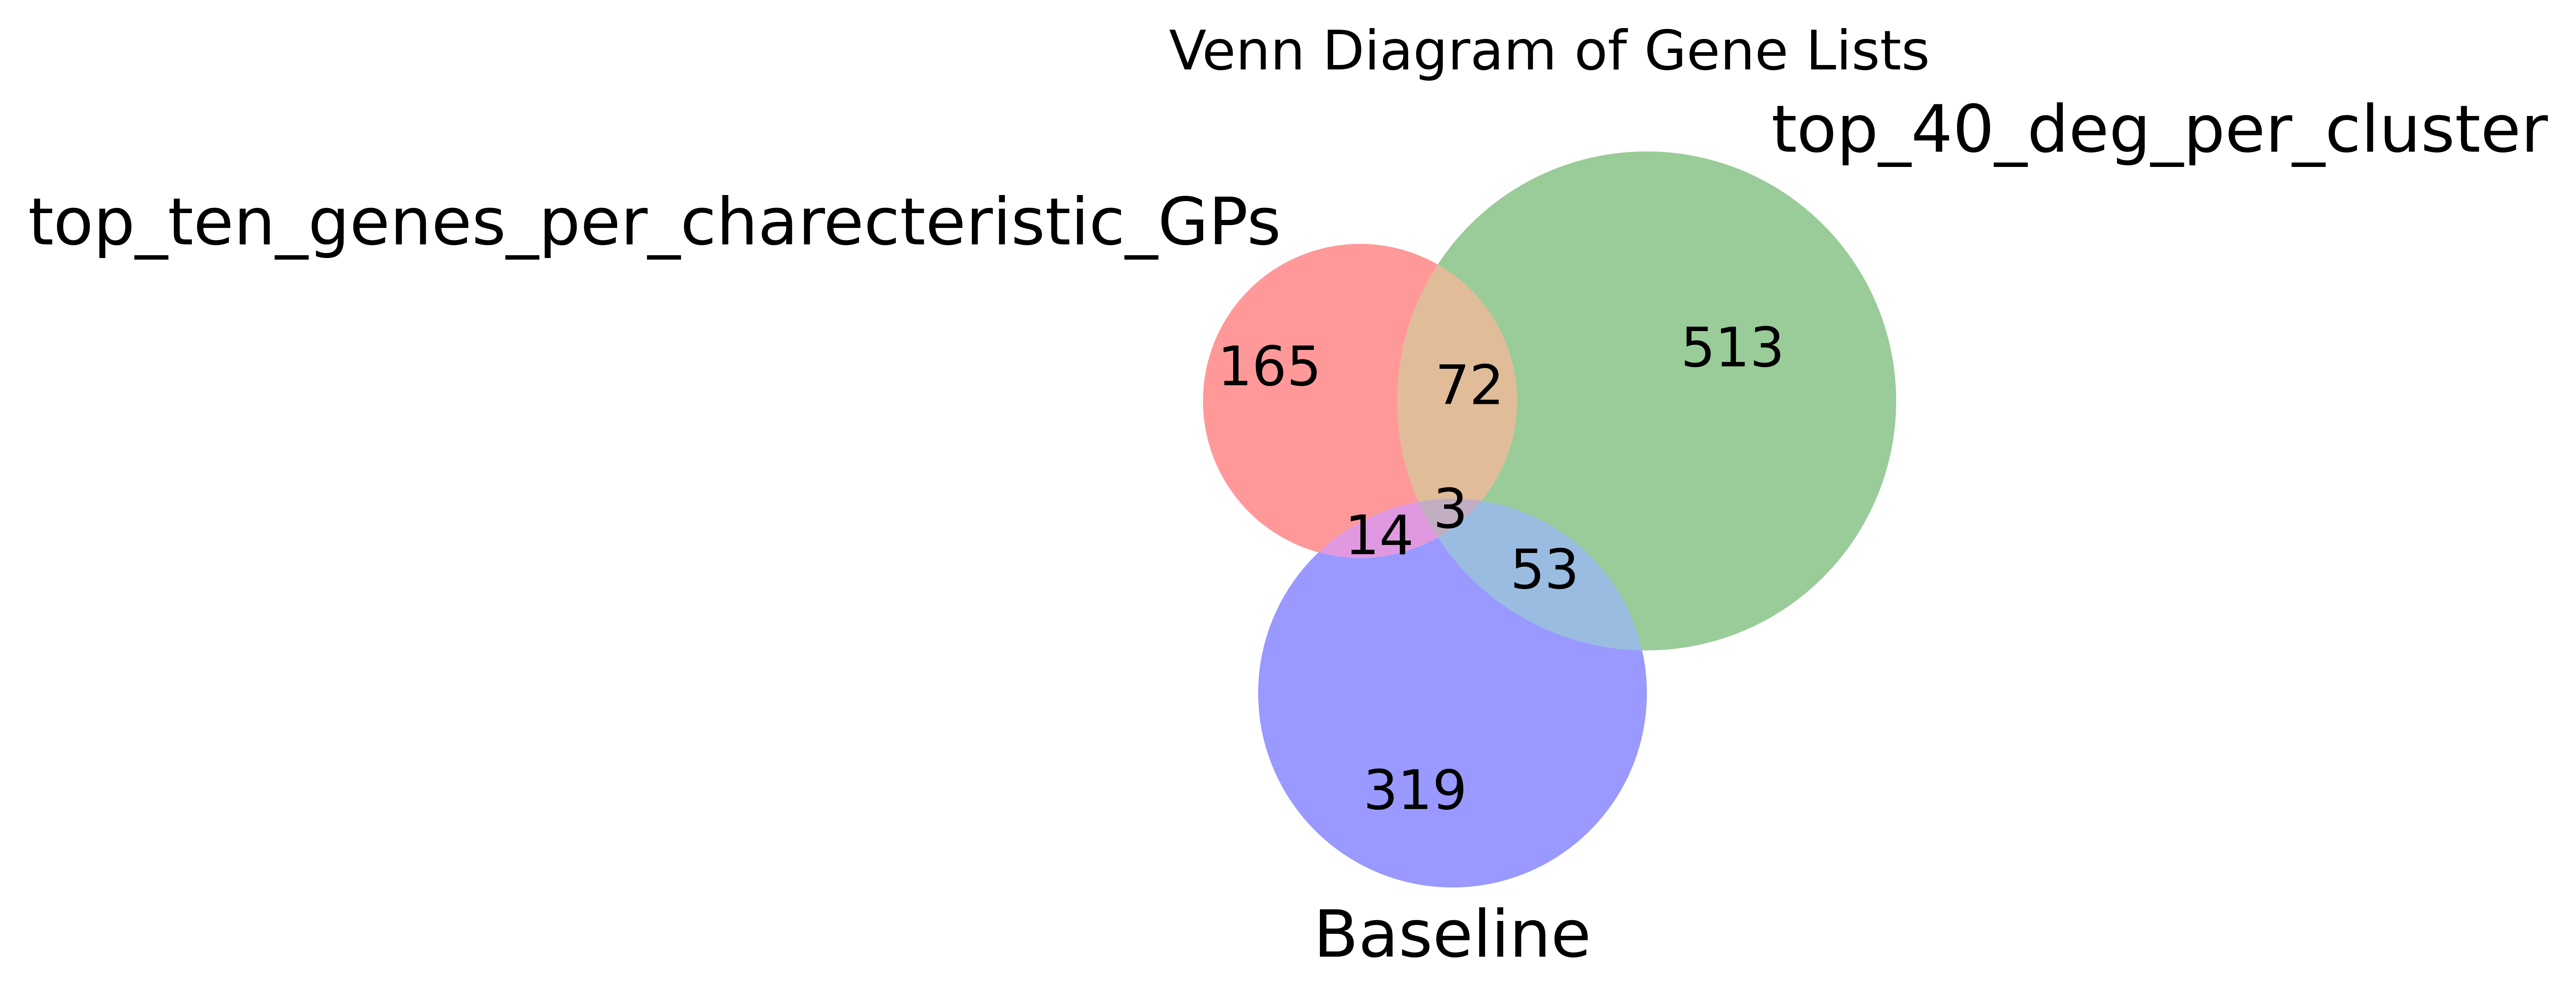

In [78]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
venn3([set1, set2, set3], ('top_ten_genes_per_charecteristic_GPs', 'top_40_deg_per_cluster','Baseline'))

plt.title('Venn Diagram of Gene Lists')
plt.show()

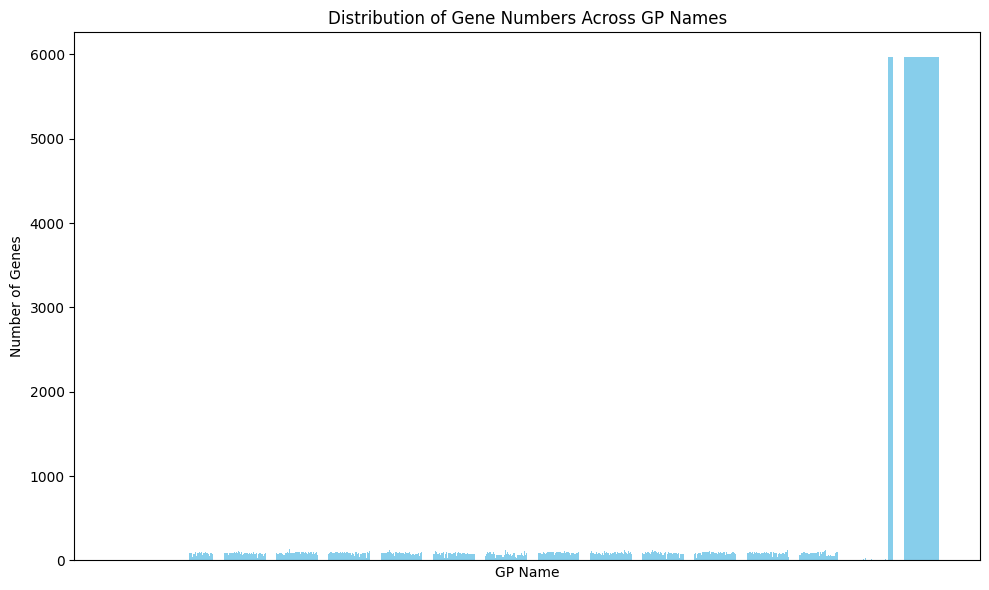

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



gp_summary_df['n_genes'] = gp_summary_df['gp_source_genes'].apply(len) + gp_summary_df['gp_target_genes'].apply(len)

plt.figure(figsize=(10, 6))
plt.bar(gp_summary_df['gp_name'], gp_summary_df['n_genes'], color='skyblue')
plt.xlabel('GP Name')
plt.ylabel('Number of Genes')
plt.title('Distribution of Gene Numbers Across GP Names')

plt.xticks(ticks=[], labels=[])

plt.tight_layout()
plt.show()

In [13]:
df_sorted = gp_summary_df.sort_values(by='n_genes', ascending=False).head(20)
df_sorted

,gp_name,all_gp_idx,gp_active,active_gp_idx,n_source_genes,n_non_zero_source_genes,n_target_genes,n_non_zero_target_genes,gp_source_genes,gp_target_genes,gp_source_genes_weights,gp_target_genes_weights,gp_source_genes_importances,gp_target_genes_importances,n_genes
1630,Add-on_99_GP,1630,True,1107,4306,4301,1658,1657,"[Sp8, Hhex, Ctsh, Pcp4l1, Irf2bpl, 2010111I01R...","[Sp9, Hes3, Evx1os, Cib2, Grtp1, Bhlha9, Colec...","[-0.7464, -0.6642, -0.6362, -0.5556, -0.552, -...","[-1.1613, -1.0981, -0.9307, -0.9086, -0.8971, ...","[0.0016, 0.0014, 0.0013, 0.0012, 0.0012, 0.001...","[0.0024, 0.0023, 0.0019, 0.0019, 0.0019, 0.001...",5964
1567,Add-on_36_GP,1567,True,1044,4306,4303,1658,1658,"[Lmx1a, Slc15a5, Mecom, Porcn, Camkk2, Wfdc21,...","[Nkx6-2, Wfdc21, St6galnac3, Six2, Stap2, Foxl...","[0.7931, 0.6162, 0.6013, 0.5954, 0.5883, 0.563...","[0.8387, 0.7819, 0.7687, 0.7669, 0.7178, 0.650...","[0.0014, 0.0011, 0.0011, 0.001, 0.001, 0.001, ...","[0.0015, 0.0014, 0.0013, 0.0013, 0.0013, 0.001...",5964
1556,Add-on_25_GP,1556,True,1033,4306,4301,1658,1658,"[Mafb, Rgcc, Pcbp3, Sp9, Aqp11, Sp8, Nkx6-2, C...","[Pantr1, A730017C20Rik, Rax, Sox13, Hes3, RMST...","[1.1109, -1.0396, 1.0041, 0.9814, 0.9259, 0.91...","[1.2271, 1.1912, 1.017, 1.0114, 0.9445, 0.9196...","[0.002, 0.0019, 0.0018, 0.0018, 0.0017, 0.0017...","[0.0022, 0.0022, 0.0018, 0.0018, 0.0017, 0.001...",5964
1557,Add-on_26_GP,1557,True,1034,4306,4305,1658,1656,"[Enpp2, Shisa3, Pax5, Pantr1, Pcp4l1, Cygb, Ub...","[Hoxa11, Nxf7, Celf4, Cpne7, Ikzf1, Cyth1, Hbq...","[1.1466, 0.9451, 0.894, 0.8247, 0.7612, 0.7177...","[1.3339, 1.1863, 1.0862, 1.0526, 1.0404, 1.023...","[0.0019, 0.0016, 0.0015, 0.0014, 0.0013, 0.001...","[0.0022, 0.002, 0.0018, 0.0018, 0.0017, 0.0017...",5964
1558,Add-on_27_GP,1558,True,1035,4306,4304,1658,1658,"[Afp, Dact2, Ngfr, 0610040J01Rik, Lhx1, Shisa3...","[Dcaf12l1, Serp2, Hoxa11, Cyth1, Gata5, Hcn4, ...","[-1.0197, -0.9707, -0.9149, -0.9056, -0.8919, ...","[-1.1778, -1.1705, -1.0098, -0.8727, -0.8664, ...","[0.0017, 0.0017, 0.0016, 0.0015, 0.0015, 0.001...","[0.002, 0.002, 0.0017, 0.0015, 0.0015, 0.0014,...",5964
1560,Add-on_29_GP,1560,True,1037,4306,4305,1658,1658,"[Shisa3, Lrrc3b, Krt15, Kcnh2, Fam78a, Krt20, ...","[Fam183b, Raet1d, Rem2, Ffar4, Sgk3, Fam134b, ...","[1.123, 0.8788, 0.8703, 0.7723, 0.7171, 0.6776...","[0.9928, 0.8629, 0.8277, 0.7753, 0.7558, 0.726...","[0.0017, 0.0014, 0.0014, 0.0012, 0.0011, 0.001...","[0.0015, 0.0013, 0.0013, 0.0012, 0.0012, 0.001...",5964
1561,Add-on_30_GP,1561,True,1038,4306,4304,1658,1657,"[Epha5, Pnliprp1, Pnliprp2, Qrfpr, Fibin, Aldo...","[Zfp442, Tceal6, Evx1os, Gm17455, Tmem213, Nkx...","[1.1813, 1.0291, 1.0135, 0.9961, 0.9924, 0.918...","[0.9665, 0.9415, 0.9344, 0.8366, 0.7499, 0.724...","[0.0019, 0.0017, 0.0017, 0.0016, 0.0016, 0.001...","[0.0016, 0.0015, 0.0015, 0.0014, 0.0012, 0.001...",5964
1562,Add-on_31_GP,1562,True,1039,4306,4305,1658,1657,"[Barhl2, Sp8, Tbx1, Irx1, Irf2bpl, Sp9, Egr2, ...","[Large2, Wnt8b, Pantr1, Wnk3, Apela, Btbd17, Z...","[1.0679, 0.9968, -0.9718, -0.9508, 0.9479, 0.9...","[-1.3269, -1.2234, -1.1925, -1.1131, -1.0368, ...","[0.0017, 0.0016, 0.0015, 0.0015, 0.0015, 0.001...","[0.0021, 0.0019, 0.0019, 0.0017, 0.0016, 0.001...",5964
1563,Add-on_32_GP,1563,True,1040,4306,4305,1658,1657,"[Barhl2, Sox1, Aqp11, Pantr1, Large2, Hes3, Dm...","[Wnt8b, Sox1, Large2, Pantr1, Hes3, Fezf1, Pdz...","[-2.3072, -1.4321, -1.3898, -1.2162, -1.2046, ...","[-1.8931, -1.6088, -1.5243, -1.5173, -1.4804, ...","[0.0033, 0.002, 0.002, 0.0017, 0.0017, 0.0017,...","[0.0027, 0.0023, 0.0022, 0.0022, 0.0021, 0.002...",5964
1564,Add-on_33_GP,1564,True,1041,4306,4303,1658,1654,"[Fezf1, Tcf7l2, Six3, Enpp2, Rax, Lhx2, Six6, ...","[Nkx2-6, Nkx6-2, Krtap17-1, Mocs1, Tmem213, Pq...","[1.0008, 0.9374, 0.9308, -0.9265, 0.8737, 0.86...","[1.8064, -1.2489, 1.2401, 1.2091, 1.164, 1.111...","[0.0016, 0.0015, 0.0015, 0.0015, 0.0014, 0.001...","[0.0029, 0.002, 0.002, 0.0019, 0.0019, 0.0018,...",5964
